In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [15.0, 10.0]
plt.rcParams['font.size'] = 24

In [4]:
from collections import namedtuple
import time

In [5]:
import numpy as np
import sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from tensorflow import keras

/Users/jamie/anaconda2/envs/pro/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

In [7]:
from my_keras import model_from_architecture

In [8]:
input_file_name = 'boston.csv'

In [9]:
param_dict = {
             'target_column': -1,
             'seed': 42
             }

In [10]:
try:
    file_data = np.genfromtxt(input_file_name, delimiter=',', skip_header=1)
except:
    print('Unable to read data file:', input_file_name)
    quit()

In [11]:
for run_param in param_dict:
    print(run_param, '\b:', param_dict[run_param])

target_column : -1
seed : 42


In [12]:
file_data.shape

(506, 14)

In [13]:
try:
    y = file_data[:, param_dict['target_column']]
except IndexError:
    print(param_dict['target_column'], 'is not a valid column.')
    quit()

mask = (file_data == file_data)
mask[:, param_dict['target_column']] = False

data_shape = file_data.shape
x = file_data[mask].reshape((data_shape[0], data_shape[1] - 1))

In [14]:
train_size = 0.75
test_size  = 0.25

In [15]:
(
x_train, 
x_test,
y_train,
y_test
) = train_test_split(
                    x, y, train_size=train_size,
                    test_size=test_size, 
                    random_state=param_dict['seed']
                    )

In [16]:
scaler = RobustScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [17]:
EPOCHS = 1000
start_time = time.time()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)
arch_list = [13,1000,5,10000,1]
lam_reg = 0.1

my_model = model_from_architecture(arch_list, 1.)
print(arch_list, lam_reg)
        
history = my_model.fit(
                      scaled_x_train, y_train, epochs=EPOCHS,
                      validation_split=0.3, 
                      verbose=0,
                      callbacks=[PrintDot(), early_stop]
                      )
        
val_loss = history.history['val_loss'][-1]
train_loss = history.history['loss'][-1]
        
print('\nval_loss:', val_loss)
print('train_loss:', train_loss)
print('time:', time.time() - start_time)

[13, 10000, 1] 0.01

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................................................

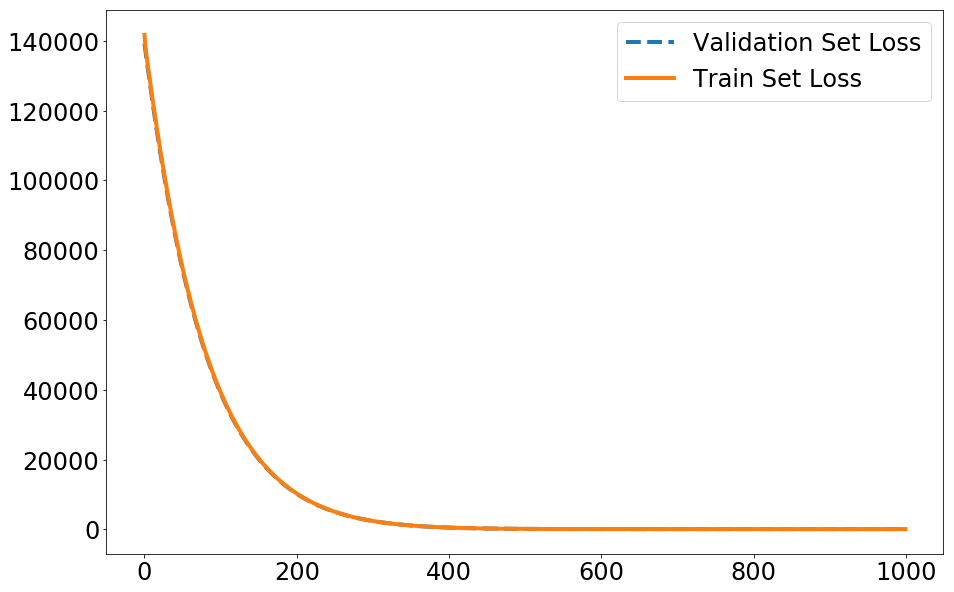

In [18]:
plt.plot(
        history.epoch, history.history['val_loss'],
        label = 'Validation Set Loss',
        lw = 4,
        ls = '--'
        )
plt.plot(
        history.epoch,
        history.history['loss'], 
        label = 'Train Set Loss',
        lw = 4
        )

plt.legend()

### Apply function to 25% held out data for direct comparison with TPOT results

In [19]:
scaled_x_test = scaler.transform(x_test)
y_predict = my_model.predict(scaled_x_test)

In [20]:
np.mean((y_predict - y_test)**2)

104.49593264089987